<a href="https://colab.research.google.com/github/saif-islam-rayhan/DataScience-and-ML/blob/main/Module_5_Assignment_Rayhan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import libraries

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    roc_curve,
    auc
)

# Load Dataset

In [8]:
df=pd.read_csv('/content/2025-09-01T04-03-42.625Z-2025-07-04T13-24-57.561Z-diabetes(1).csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [10]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [11]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


# Features & Target Split

In [12]:
X=df.drop('Outcome',axis=1)
y=df['Outcome']

# Train & Test Split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Feature Scaling

In [14]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Helper Functions

In [15]:
def evaluate_model(name, model, X_train, X_test, scaled=False):
    """Train, predict, evaluate and plot ROC"""
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:,1]

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(4,3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    # Classification Report
    print(f"\n{name} - Classification Report:")
    print(classification_report(y_test, y_pred))

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(5,4))
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")
    plt.plot([0,1], [0,1], linestyle="--", color="gray")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"{name} - ROC Curve")
    plt.legend()
    plt.show()

    return roc_auc

# Models

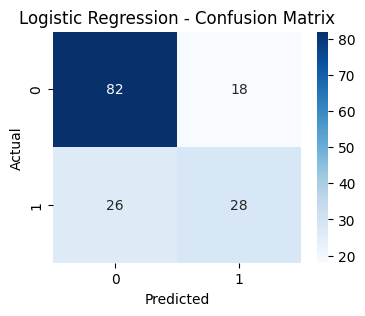


Logistic Regression - Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.82      0.79       100
           1       0.61      0.52      0.56        54

    accuracy                           0.71       154
   macro avg       0.68      0.67      0.67       154
weighted avg       0.71      0.71      0.71       154



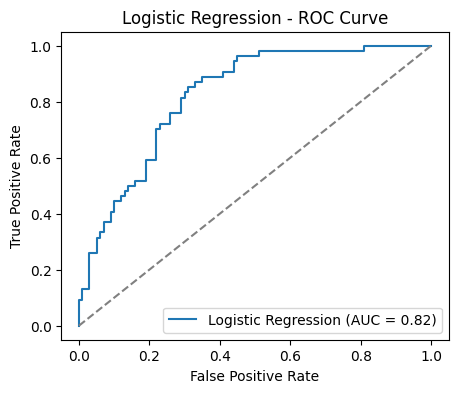

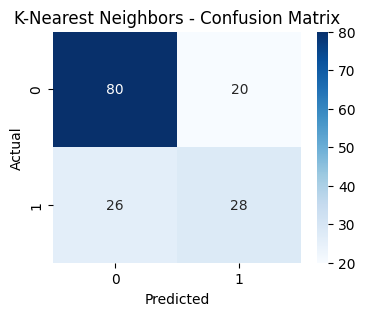


K-Nearest Neighbors - Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.80      0.78       100
           1       0.58      0.52      0.55        54

    accuracy                           0.70       154
   macro avg       0.67      0.66      0.66       154
weighted avg       0.69      0.70      0.70       154



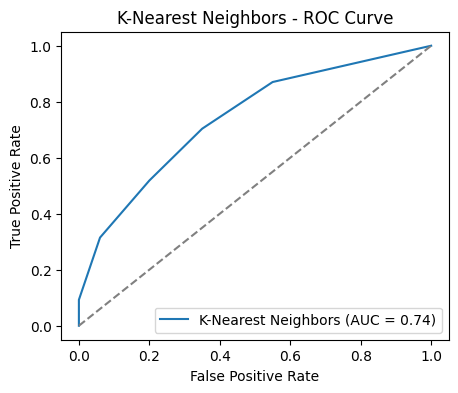

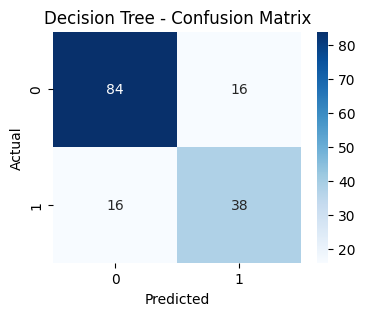


Decision Tree - Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.84      0.84       100
           1       0.70      0.70      0.70        54

    accuracy                           0.79       154
   macro avg       0.77      0.77      0.77       154
weighted avg       0.79      0.79      0.79       154



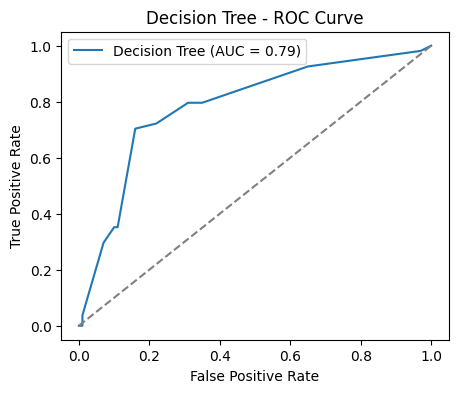

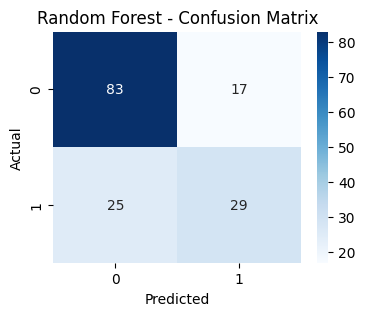


Random Forest - Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.83      0.80       100
           1       0.63      0.54      0.58        54

    accuracy                           0.73       154
   macro avg       0.70      0.68      0.69       154
weighted avg       0.72      0.73      0.72       154



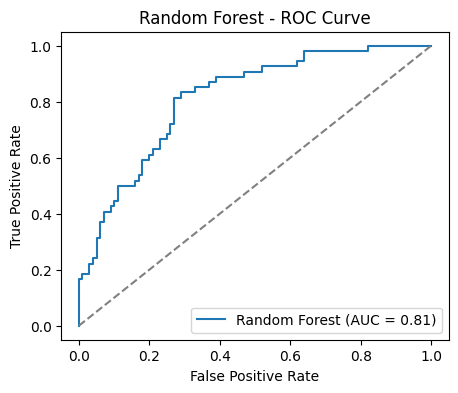

In [16]:
results = {}

# Logistic Regression (scaled)
log_reg = LogisticRegression(max_iter=1000, random_state=42)
results["Logistic Regression"] = evaluate_model(
    "Logistic Regression", log_reg, X_train_scaled, X_test_scaled
)

# K-Nearest Neighbors (scaled)
knn = KNeighborsClassifier(n_neighbors=5)
results["KNN"] = evaluate_model(
    "K-Nearest Neighbors", knn, X_train_scaled, X_test_scaled
)

# Decision Tree (no scaling needed)
dt = DecisionTreeClassifier(random_state=42, max_depth=5)
results["Decision Tree"] = evaluate_model(
    "Decision Tree", dt, X_train, X_test
)

# Random Forest (Bonus)
rf = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=7)
results["Random Forest"] = evaluate_model(
    "Random Forest", rf, X_train, X_test
)

# Summary of AUC

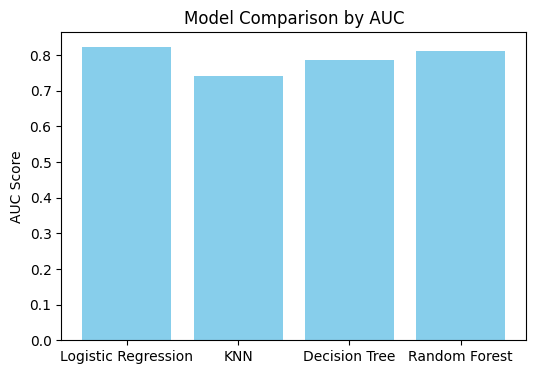


Final AUC Scores:
Logistic Regression: 0.823
KNN: 0.740
Decision Tree: 0.786
Random Forest: 0.813


In [18]:
plt.figure(figsize=(6,4))
plt.bar(results.keys(), results.values(), color="skyblue")
plt.ylabel("AUC Score")
plt.title("Model Comparison by AUC")
plt.show()

print("\nFinal AUC Scores:")
for model, auc_score in results.items():
    print(f"{model}: {auc_score:.3f}")
